<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/Topic_Modelling_With_LDA_and_TextHero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modelling 

Topic Modeling is similar to dividing a bookstore based on the content of the books as it refers to the process of discovering themes in a text corpus and annotating the documents based on the identified topics.


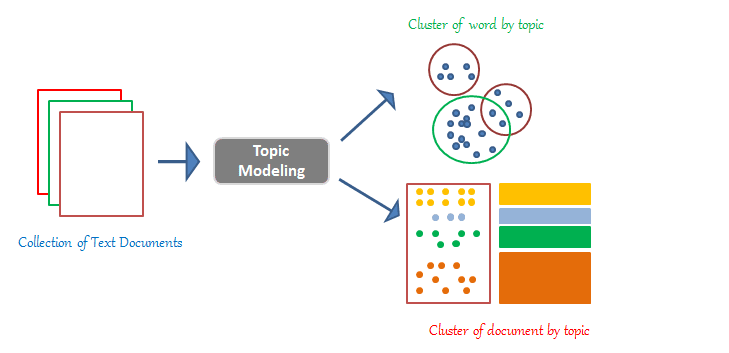

## Latent Dirichlet Allocation (LDA) :

* Latent Dirichlet Allocation is one of the ways to implement Topic Modelling. 

* It is a generative probabilistic model in which each document is assumed to be consisting of a different proportion of topics.

## How does the LDA algorithm work?
The following steps are carried out in LDA to assign topics to each of the documents:

1) For each document, randomly initialize each word to a topic amongst the K topics where K is the number of pre-defined topics.

2)  For each document d:

      For each word w in the document, compute:

        * P(topic t| document d): Proportion of words in document d that are assigned to topic t
        * P(word w| topic t): Proportion of assignments to topic t across all documents from words that come from w

3) Reassign topic T’ to word w with probability **p(t’|d)*p(w|t’)** considering all other words and their topic assignments

## Topic Modelling using LDA in Python:
Data : the ‘Amazon Fine Food Reviews’ data from Kaggle (https://www.kaggle.com/snap/amazon-fine-food-reviews) 

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"c587f0d6cf361f7851564bf59eca62d7"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-20 07:51:04           9514  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5784  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2133  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2452  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [5]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

100% 241M/242M [00:04<00:00, 60.6MB/s]
100% 242M/242M [00:04<00:00, 55.5MB/s]


In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! unzip "/content/archive (1).zip" -d "/content/drive/MyDrive/Learn_NLP"

Archive:  /content/archive (1).zip
  inflating: /content/drive/MyDrive/Learn_NLP/Reviews.csv  
  inflating: /content/drive/MyDrive/Learn_NLP/database.sqlite  
  inflating: /content/drive/MyDrive/Learn_NLP/hashes.txt  


In [7]:
!pip install texthero

     |████████████████████████████████| 1.5 MB 17.6 MB/s 
     |████████████████████████████████| 241 kB 69.2 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [8]:
import texthero as hero
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import pandas as pd
rev = pd.read_csv("/content/drive/MyDrive/Learn_NLP/Reviews.csv")
rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
rev.shape

(568454, 10)

## Pre-processing the text using texthero

The default pipeline for the clean method is the following:

* fillna(s) Replace not assigned values with empty spaces.
* lowercase(s) Lowercase all text.
remove_digits() Remove all blocks of digits.
* remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
* remove_diacritics() Remove all accents from strings.
* remove_stopwords() Remove all stop words.
* remove_whitespace() Remove all white space between words.

In [11]:
rev['clean_text'] = hero.clean(rev['Text'])

In [12]:
rev[['Text','clean_text']].head()

,Text,clean_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


##TFIDF vectorization on the cleaned text column

* TFIDF refers to Term Frequency Inverse Document Frequency – as this vectorization compares the number of times a word appears in a document with the number of documents that contain the word.

* TFIDF vectorization on the text column gives us a document term matrix on which we can carry out the topic modelling.


In [14]:
tfidf_output = hero.tfidf(rev['clean_text'],max_features=100,return_feature_names=True)

In [18]:
tfidf_output[1]

['add',
 'also',
 'always',
 'amazon',
 'back',
 'bag',
 'best',
 'better',
 'bit',
 'bought',
 'box',
 'br',
 'brand',
 'buy',
 'cat',
 'chips',
 'chocolate',
 'coffee',
 'could',
 'cup',
 'day',
 'delicious',
 'different',
 'dog',
 'dogs',
 'drink',
 'eat',
 'enough',
 'even',
 'every',
 'favorite',
 'find',
 'first',
 'flavor',
 'flavors',
 'food',
 'found',
 'free',
 'get',
 'give',
 'go',
 'good',
 'got',
 'great',
 'healthy',
 'hot',
 'however',
 'ingredients',
 'know',
 'less',
 'like',
 'little',
 'lot',
 'love',
 'loves',
 'made',
 'make',
 'makes',
 'many',
 'milk',
 'mix',
 'much',
 'never',
 'nice',
 'one',
 'order',
 'organic',
 'price',
 'product',
 'quality',
 'really',
 'recommend',
 'right',
 'say',
 'since',
 'small',
 'something',
 'still',
 'store',
 'stuff',
 'sugar',
 'sweet',
 'taste',
 'tastes',
 'tea',
 'think',
 'time',
 'treats',
 'tried',
 'try',
 'two',
 'use',
 'used',
 'want',
 'water',
 'way',
 'well',
 'without',
 'would',
 'years']

In [16]:
rev['tfidf_clean_text'] = tfidf_output[0]

In [17]:
rev[['Text','clean_text','tfidf_clean_text']].head()

,Text,clean_text,tfidf_clean_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54021427..."
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
word_vector = rev['tfidf_clean_text'].values.tolist()

In [20]:
word_document_matrix = np.array(word_vector)

In [21]:
word_document_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.14481919, 0.        , ..., 0.18148332, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
word_document_matrix.shape

(568454, 100)

## Visualization
* To visualize the data, we map each point to a two-dimensional representation with PCA. 
* The principal component analysis algorithms returns the combination of attributes that better account the variance in the data.

In [ ]:
rev['pca_tfidf_clean_text'] = hero.pca(rev['tfidf_clean_text'])

In [ ]:
rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text,tfidf_clean_text,pca_tfidf_clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54021427...","[-0.10873530359178336, -0.18812078876182003]"
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10188536382452373, -0.148507210547543]"
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0963362207020455, -0.0396775561180935]"
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.11024942135267986, -0.005952800766952483]"
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.17714084362225657, -0.06746180330070009]"


## LDA on the vectorized text:
The parameters that we have given to the LDA model, as shown below, include the number of topics, the learning method (which is the way the algorithm updates the assignments of the topics to the documents), the maximum number of iterations to be carried out and the random state. 

* The parameters that we have given to the LDA model, as shown below, 
  *  the number of topics, the learning method (which is the way the algorithm updates the assignments of the topics to the documents), 
  * the maximum number of iterations to be carried out and the random state.

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
                                    learning_method='online',
                                    random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(word_document_matrix)

## Checking the results

In [24]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.599944986912182 %
Topic  1 :  2.5998736016945556 %
Topic  2 :  2.599782717124917 %
Topic  3 :  57.93860181870634 %
Topic  4 :  2.600345299420117 %
Topic  5 :  2.5997513014091815 %
Topic  6 :  2.5999398011544246 %
Topic  7 :  2.6000427850761265 %
Topic  8 :  21.262240092727414 %
Topic  9 :  2.599477595774737 %


In [33]:
print("Document 3: ")
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%")

Document 3: 
Topic  0 :  3.124701316517804 %
Topic  1 :  3.1248558591778623 %
Topic  2 :  3.125000573163971 %
Topic  3 :  71.87621587928929 %
Topic  4 :  3.125519456442923 %
Topic  5 :  3.1246867158803497 %
Topic  6 :  3.124888777683727 %
Topic  7 :  3.1255200079020926 %
Topic  8 :  3.1246566478497275 %
Topic  9 :  3.1239547660922615 %


## Analyzing the Topics:

In [25]:
vocab = tfidf_output[1]

In [26]:
doc ={}
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     k = []
     for item in sorted_words:
       k.append(item[0])
     print(" ".join(k))
     doc[i] = " ".join(k)

Topic 0: 
best favorite one right every flavors many tried always love
Topic 1: 
water hot mix br organic add milk makes like taste
Topic 2: 
chocolate different like sugar taste think say try something enough
Topic 3: 
price amazon store find product better great buy good found
Topic 4: 
product would free used go bought recommend back never great
Topic 5: 
coffee tea cup drink flavor like taste good great love
Topic 6: 
br chips like good taste one flavor product bag amazon
Topic 7: 
great like good delicious taste nice stuff flavor really tastes
Topic 8: 
dog food treats dogs cat loves small br eat one
Topic 9: 
box order loves bag healthy great one could eat good


In [27]:
doc

{0: 'best favorite one right every flavors many tried always love',
 1: 'water hot mix br organic add milk makes like taste',
 2: 'chocolate different like sugar taste think say try something enough',
 3: 'price amazon store find product better great buy good found',
 4: 'product would free used go bought recommend back never great',
 5: 'coffee tea cup drink flavor like taste good great love',
 6: 'br chips like good taste one flavor product bag amazon',
 7: 'great like good delicious taste nice stuff flavor really tastes',
 8: 'dog food treats dogs cat loves small br eat one',
 9: 'box order loves bag healthy great one could eat good'}

## Analyzing Associted Topics

In [37]:

print("Document 3: and associated topics")
print(rev.iloc[3]['Text'])
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%","associated topics comprises : {",doc[i],"}")

Document 3: and associated topics
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.
Topic  0 :  3.124701316517804 % associated topics comprises : { best favorite one right every flavors many tried always love }
Topic  1 :  3.1248558591778623 % associated topics comprises : { water hot mix br organic add milk makes like taste }
Topic  2 :  3.125000573163971 % associated topics comprises : { chocolate different like sugar taste think say try something enough }
Topic  3 :  71.87621587928929 % associated topics comprises : { price amazon store find product better great buy good found }
Topic  4 :  3.125519456442923 % associated topics comprises : { product would free used go bought recommend back never great }
Topic  5 :  3.1246867158803497 % associated topics comprises : { coffee tea cup drink flavor like taste good great